##Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')

 Read the training data

In [5]:
train_data = pd.read_csv("training_set (1).csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


Drop the unnecessary columns from traing set

In [8]:
train_data = train_data.drop(["Loan_ID"],axis=1)

Preprocess the data: convert '3+' to '3' in Dependents column

In [10]:
train_data["Dependents"] = train_data["Dependents"].str.replace("+","")

Convort dependents column to numeric typy

In [14]:
train_data["Dependents"] = pd.to_numeric(train_data["Dependents"],errors='coerce')

Handel missing values replace with column mean

In [17]:
train_data = train_data.fillna(train_data.mean)

Encode categorical variables in the training data

In [18]:
le = LabelEncoder()
train_data["Gender"] = le.fit_transform(train_data["Gender"].astype(str))
train_data["Married"] = le.fit_transform(train_data["Married"].astype(str))
train_data["Education"] = le.fit_transform(train_data["Education"].astype(str))
train_data["Self_Employed"] = le.fit_transform(train_data["Self_Employed"].astype(str))
train_data["Property_Area"] = le.fit_transform(train_data["Property_Area"].astype(str))
train_data["Loan_Status"] = le.fit_transform(train_data["Loan_Status"].astype(str))

Perform one-hot encoding for remaining categorical variables

In [19]:
train_data_encoded = pd.get_dummies(train_data)

Split the training data into features (X) and target variable(Y)

In [20]:
X = train_data_encoded.drop(["Loan_Status"],axis=1)
Y = train_data_encoded["Loan_Status"]

Train a decision tree classifier

In [21]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

In [33]:
Y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [34]:
tr_pred = model.predict(X)
ts_pred = model.predict(X)

Calculate accuracy score for base model

In [35]:
tr_acc = accuracy_score(Y,tr_pred)
ts_acc = accuracy_score(Y,ts_pred)
print("Training Accuracy:",tr_acc)
print("Testing Accuracy:",ts_acc)

Training Accuracy: 0.8159609120521173
Testing Accuracy: 0.8159609120521173


In [36]:
cf = confusion_matrix(Y,ts_pred)
cf

array([[ 85, 107],
       [  6, 416]], dtype=int64)

<Axes: >

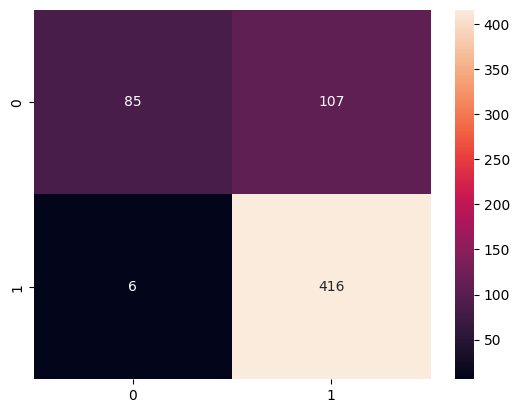

In [37]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

Read testing data

In [38]:
testing_data = pd.read_csv("testing_set (1).csv")
testing_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Preprocess the data: convert '3+' to '3' in Dependents column

In [40]:
testing_data["Dependents"] = testing_data["Dependents"].str.replace('+','')

Convert dependents column to numric type

In [41]:
testing_data["Dependents"] = pd.to_numeric(testing_data["Dependents"],errors='coerce')

Handle missing values: replace with column mean

In [42]:
testing_data = testing_data.fillna(testing_data.mean)

In [43]:
testing_data["Gender"] = le.fit_transform(testing_data["Gender"].astype(str))
testing_data["Married"] = le.fit_transform(testing_data["Married"].astype(str))
testing_data["Education"] = le.fit_transform(testing_data["Education"].astype(str))
testing_data["Self_Employed"] = le.fit_transform(testing_data["Self_Employed"].astype(str))
testing_data["Property_Area"] = le.fit_transform(testing_data["Property_Area"].astype(str))

Perform one-hot encoding for remaining categorical variables

In [44]:
testing_data_encoded = pd.get_dummies(testing_data)

Align the test data columns with the training data columns

In [45]:
testing_data_encoded = testing_data_encoded.reindex(columns=X.columns,fill_value=0)

Make predictions on th testing data

In [46]:
predictions = model.predict(testing_data_encoded)

Map numric prediction to labels

In [47]:
prediction_labels = ["N" if prediction == 0 else "Y" for prediction in predictions]

Print the predictions

In [48]:
print("Loan_Stetus")
for prediction in prediction_labels:
    print(prediction)

Loan_Stetus
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
